## Learning Atari - Deep Reinforcement Learning

Reinforcement learning examples from the web. Using the open gym. This is based on: https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_cartpole.py

Here the RAM version of the atari example is used which is of lower dimension than the image. The neural network has not been adapted for the atari example, it uses the simple cartpole example.

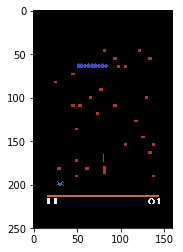

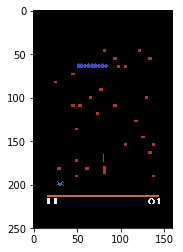

In [57]:
import numpy as np
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Centipede-ram-v0')
env.reset()
for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    env.step(env.action_space.sample())

The input dimension is an image of shape

In [58]:
env.reset().shape

(128,)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [60]:
# Get the environment and extract the number of actions.
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n
nb_actions

18

In [61]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
__________

In [62]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=5000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [63]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=5000, visualize=True, verbose=2)

Training for 5000 steps ...


/usr/local/lib/python3.5/dist-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


 1144/5000: episode: 1, duration: 11.435s, episode steps: 1144, steps per second: 100, episode reward: 1562.000, mean reward: 1.365 [0.000, 300.000], mean action: 9.212 [0.000, 16.000], mean observation: 57.555 [0.000, 255.000], loss: 67.928077, mean_absolute_error: 11.186689, mean_q: 23.354062
 3325/5000: episode: 2, duration: 19.496s, episode steps: 2181, steps per second: 112, episode reward: 6618.000, mean reward: 3.034 [0.000, 900.000], mean action: 9.766 [0.000, 16.000], mean observation: 59.219 [0.000, 255.000], loss: 357.143036, mean_absolute_error: 62.610542, mean_q: 96.646935
done, took 45.937 seconds


In [64]:
dqn.save_weights('agents/dqn_{}_weights.h5f'.format('Centipede-ram-v0'), overwrite=True)

Finally show an example of playing the game

In [65]:
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 4689.000, steps: 1178
Episode 2: reward: 7027.000, steps: 1894
Episode 3: reward: 2066.000, steps: 1139
Episode 4: reward: 2604.000, steps: 1092
Episode 5: reward: 4870.000, steps: 1530


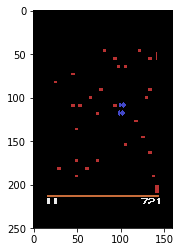

In [ ]:
obs = env.reset()
for _ in range(1000):
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    obs, reward, done, info = env.step(dqn.forward(observation))